<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-数据导入及预处理" data-toc-modified-id="1-数据导入及预处理-1">1 数据导入及预处理</a></span><ul class="toc-item"><li><span><a href="#1.1-数据导入" data-toc-modified-id="1.1-数据导入-1.1">1.1 数据导入</a></span></li><li><span><a href="#1.2-数据描述" data-toc-modified-id="1.2-数据描述-1.2">1.2 数据描述</a></span></li><li><span><a href="#1.3-数据预处理" data-toc-modified-id="1.3-数据预处理-1.3">1.3 数据预处理</a></span></li></ul></li><li><span><a href="#2-情感分析" data-toc-modified-id="2-情感分析-2">2 情感分析</a></span><ul class="toc-item"><li><span><a href="#2.1-情感分" data-toc-modified-id="2.1-情感分-2.1">2.1 情感分</a></span></li><li><span><a href="#2.2-情感分直方图" data-toc-modified-id="2.2-情感分直方图-2.2">2.2 情感分直方图</a></span></li><li><span><a href="#2.3-词云图" data-toc-modified-id="2.3-词云图-2.3">2.3 词云图</a></span></li><li><span><a href="#2.4-关键词提取" data-toc-modified-id="2.4-关键词提取-2.4">2.4 关键词提取</a></span></li></ul></li><li><span><a href="#3-积极评论与消极评论" data-toc-modified-id="3-积极评论与消极评论-3">3 积极评论与消极评论</a></span><ul class="toc-item"><li><span><a href="#3.1-积极评论与消极评论占比" data-toc-modified-id="3.1-积极评论与消极评论占比-3.1">3.1 积极评论与消极评论占比</a></span></li><li><span><a href="#3.2-消极评论分析" data-toc-modified-id="3.2-消极评论分析-3.2">3.2 消极评论分析</a></span></li></ul></li><li><span><a href="#总结" data-toc-modified-id="总结-4">总结</a></span></li></ul></div>

# 1 数据导入及预处理

## 1.1 数据导入

In [1]:
import pandas as pd
data = pd.read_csv('./京东评论数据.csv')
data.head(2)

,sku_id,_id,item_name,comment_id,content,creation_time,reply_count,score,useful_vote_count,useless_vote_count,...,user_province,nickname,user_level_name,user_client,user_client_show,is_mobile,days,reference_time,after_days,after_user_comment
0,7534113,03b51aa9-2b5e-41c3-a40b-343164a1d23a,comment,11801751173,还可以刷脸解锁，帮朋友买的，她很满意,2018-08-13 12:24:59,0,5,0,0,...,NaN,k***0,PLUS会员,2,来自京东iPhone客户端,1.0,4.0,2018-08-09 13:38:15,0.0,NO_MESSAGE
1,7534113,03b51aa9-2b5e-41c3-a40b-343164a1d23a,comment,11525358140,第一次买vivo，真心不错，1498的机子，没想到照相很清晰，性价比很高，买值了，还送了小音...,2018-05-27 17:49:17,7,5,19,0,...,NaN,呢***呐,PLUS会员,4,来自京东Android客户端,1.0,5.0,2018-05-22 09:32:37,0.0,NO_MESSAGE


## 1.2 数据描述


In [2]:
data.describe()

,sku_id,comment_id,reply_count,score,useful_vote_count,useless_vote_count,user_level_id,user_province,user_client,is_mobile,days,after_days
count,3.637000e+03,3.637000e+03,3637.000000,3637.000000,3637.000000,3637.0,3637.000000,0.0,3637.000000,3636.000000,3636.000000,3636.000000
mean,7.936312e+09,1.161979e+10,6.291724,4.880946,13.532307,0.0,75.692329,NaN,4.480066,0.894114,9.451045,1.475248
std,1.165137e+10,2.520618e+08,41.624571,0.591341,72.564442,0.0,21.125683,NaN,4.644212,0.307733,13.169849,9.862867
min,1.592994e+06,1.045844e+10,0.000000,1.000000,0.000000,0.0,50.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,5.920651e+06,1.155459e+10,0.000000,5.000000,0.000000,0.0,61.000000,NaN,2.000000,1.000000,2.000000,0.000000
50%,7.651903e+06,1.174154e+10,0.000000,5.000000,0.000000,0.0,62.000000,NaN,4.000000,1.000000,4.000000,0.000000
75%,2.034912e+10,1.178850e+10,1.000000,5.000000,2.000000,0.0,105.000000,NaN,4.000000,1.000000,11.000000,0.000000
max,3.032369e+10,1.180889e+10,1355.000000,5.000000,2318.000000,0.0,105.000000,NaN,29.000000,1.000000,191.000000,191.000000


## 1.3 数据预处理

In [3]:
#取出sku_id','content'字段
data1 = data[['sku_id','content']]
data1.head(10)

,sku_id,content
0,7534113,还可以刷脸解锁，帮朋友买的，她很满意
1,7534113,第一次买vivo，真心不错，1498的机子，没想到照相很清晰，性价比很高，买值了，还送了小音...
2,7534113,手机好用快递送的快。
3,8240587,手机收到。外观设计很好！美观大方。我喜欢！一直使用华为手机。从荣耀七，荣耀八，荣耀九。反正一...
4,5942439,收到了，挺好的，声音大，电池大，好用发货速度快，非常满意，好好好。
5,5089275,本来觉得双十一还会便宜的，想不到和11月初的价格差不多，想想还是感觉入手了，早买早享受。我的...
6,7081550,没有真正意义上的窄边框，不过已经不错了，手机流畅，另外还有51G空间可用，同时试了下近距拍摄...
7,5663902,幻夜黑颜色很漂亮，2.5D屏幕，圆润。2K屏很清晰，惊艳
8,7283905,特地用了一段时间才来评价，这手机值得这个价钱，打游戏还行，就是电池很不耐用，摄像头也很突出，...
9,5001213,机器没得说，价格也合理，虽说仍有不足，但还是比较满意的，首发就抢到了，暂时发现的不足就是扬声...


# 2 情感分析

## 2.1 情感分

In [4]:
#安装snownlp包
!pip install snownlp  -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 37.6/37.6 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760953 sha256=400f03511ccda3443b1a0c80aa51754ac9840c0a2e37c47eadb04472268b8d67
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\e3\39\48\6bf6f2fdb44ab1aeb2bbbc27b79941ff05d39d181fdaad0fb5
Successfully built snownlp



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from snownlp import SnowNLP
data1['emotion'] = data1['content'].apply(lambda x:SnowNLP(x).sentiments)
data1.head(10)

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_14348\3076741958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['emotion'] = data1['content'].apply(lambda x:SnowNLP(x).sentiments)


,sku_id,content,emotion
0,7534113,还可以刷脸解锁，帮朋友买的，她很满意,0.470635
1,7534113,第一次买vivo，真心不错，1498的机子，没想到照相很清晰，性价比很高，买值了，还送了小音...,0.999999
2,7534113,手机好用快递送的快。,0.561609
3,8240587,手机收到。外观设计很好！美观大方。我喜欢！一直使用华为手机。从荣耀七，荣耀八，荣耀九。反正一...,0.868183
4,5942439,收到了，挺好的，声音大，电池大，好用发货速度快，非常满意，好好好。,0.983088
5,5089275,本来觉得双十一还会便宜的，想不到和11月初的价格差不多，想想还是感觉入手了，早买早享受。我的...,0.984574
6,7081550,没有真正意义上的窄边框，不过已经不错了，手机流畅，另外还有51G空间可用，同时试了下近距拍摄...,0.956682
7,5663902,幻夜黑颜色很漂亮，2.5D屏幕，圆润。2K屏很清晰，惊艳,0.999839
8,7283905,特地用了一段时间才来评价，这手机值得这个价钱，打游戏还行，就是电池很不耐用，摄像头也很突出，...,0.996540
9,5001213,机器没得说，价格也合理，虽说仍有不足，但还是比较满意的，首发就抢到了，暂时发现的不足就是扬声...,0.992436


In [6]:
data1.describe()

,sku_id,emotion
count,3.637000e+03,3637.000000
mean,7.936312e+09,0.746161
std,1.165137e+10,0.354481
min,1.592994e+06,0.000000
25%,5.920651e+06,0.562240
50%,7.651903e+06,0.962449
75%,2.034912e+10,0.999123
max,3.032369e+10,1.000000


* emotion平均值为0.74，中位数为0.96，25%分位数为0.56，可见不到25%的数据造成了整体均值的较大下移。

## 2.2 情感分直方图

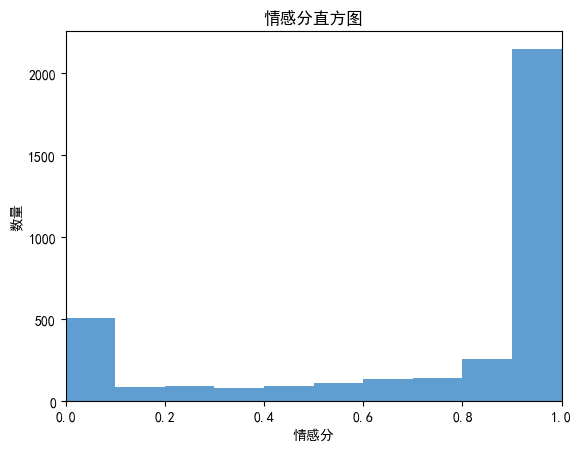

In [7]:
#情感分直方图
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

bins=np.arange(0,1.1,0.1)
plt.hist(data1['emotion'],bins,color='#4F94CD',alpha=0.9)
plt.xlim(0,1)
plt.xlabel('情感分')
plt.ylabel('数量')
plt.title('情感分直方图')

plt.show()

* 由直方图可见，评论内容两级分化较为严重；

* 3637条评论中有约2200条评论情感分在[0.9，1]区间内；同时，有约500条评论情感分在[0，0.1]区间内。

## 2.3 词云图

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\2\jieba.cache
Loading model cost 1.096 seconds.
Prefix dict has been built successfully.


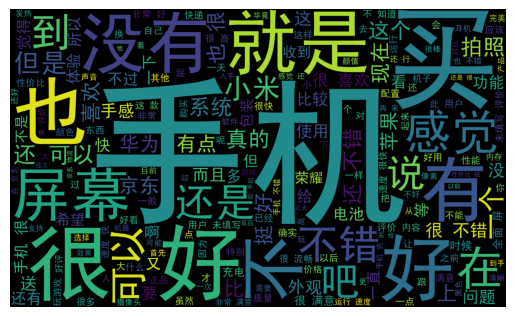

In [8]:
from wordcloud import WordCloud
import jieba
w = WordCloud()
text = ''
for s in data['content']:
    text += s
data_cut = ' '.join(jieba.lcut(text))

w = WordCloud(font_path="./SimHei.ttf",
                      stopwords=['的','我','了','是','和','都','就','用'],  # 去掉停用词
                      #max_words=100,
                      width=2000,
                      height=1200).generate(data_cut)
# 保存词云
w.to_file('词云图.png')
# 显示词云文件
plt.imshow(w)
plt.axis("off")
plt.show()

## 2.4 关键词提取

In [9]:
#关键词top10
from jieba import analyse 
key_words = jieba.analyse.extract_tags(sentence=text, topK=10, withWeight=True, allowPOS=())
key_words

[('手机', 0.20904023041744998),
 ('不错', 0.10491967558213072),
 ('京东', 0.09431019624843097),
 ('屏幕', 0.054966423247022445),
 ('华为', 0.05061411737589104),
 ('小米', 0.04731076382922812),
 ('拍照', 0.04647606302614274),
 ('非常', 0.044200923839597485),
 ('手感', 0.04270424332006433),
 ('感觉', 0.040063432512755605)]

* 以上关键词显示，消费者比较在意手机的“屏幕”“拍照”“手感”等特性，“华为”“小米”是出现频次最高的两个手机品牌。

# 3 积极评论与消极评论

## 3.1 积极评论与消极评论占比

In [10]:
#计算积极评论与消极评论各自的数目
pos = 0
neg = 0
for i in data1['emotion']:
    if i >= 0.5:
        pos += 1
    else:
        neg += 1
print('积极评论，消极评论数目分别为：',pos,neg)


积极评论，消极评论数目分别为： 2791 846


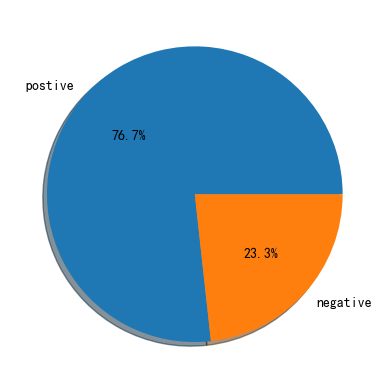

In [11]:
# 积极评论占比
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

pie_labels='postive','negative'
plt.pie([pos,neg],labels=pie_labels,autopct='%1.1f%%',shadow=True)

plt.show()

## 3.2 消极评论分析

In [12]:
#获取消极评论数据
data2=data1[data1['emotion']<0.5]
data2.head(10)

,sku_id,content,emotion
0,7534113,还可以刷脸解锁，帮朋友买的，她很满意,0.470635
13,5942439,收到货，声音很大，功能也多，适合老人用，就是重量有点重，,0.461794
17,7283905,27号下的单，今天收到1星期内，坐标河南商丘，手机是武汉仓过来的。充电头是5V2A的 不支持...,0.001627
18,5001213,今天刚收到！\n看到京东的快递包装盒，我内心是一群奔腾而过的！几千块钱的物品包装，没有防压提...,0.495955
22,5942439,用着目前还可以，就是不知道可以用多久。希望久一些吧。,0.239150
32,5001213,第一批抢到，两天后才收到，机器没一代惊艳，边框略粗，全面屏？解决了通话，回归正常手机行列！！...,0.444317
35,8240587,总体来说，颜值非常高，很好看，虽然说是后置指纹，但是后背看起来还是挺不错的。用起来整体体验还...,0.000012
44,3901175,手机还可以，就刚开始把卡放进去的时候不显示卡，过了第二天才显示出来，耳机也没有，还有就是怎么...,0.005839
48,7534113,像素不行，反正买都买了用都用了总体来说还行吧不讨厌也不喜欢一般般，暂时没有什么问题,0.499447
51,5089275,总之还是挺好的，挺不错、虽然没有什么优惠吧，抢了个神券还不能用！！！也是用的上了第三个苹果、...,0.457264


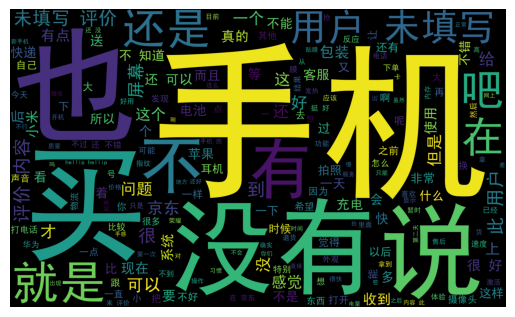

In [13]:
#消极评论词云图
text2 = ''
for s in data2['content']:
    text2 += s
data_cut2 = ' '.join(jieba.lcut(text2))
w.generate(data_cut2)
image = w.to_file('消极评论词云.png')

# 显示词云文件
plt.imshow(w)
plt.axis("off")
plt.show()

In [14]:
#消极评论关键词top10
key_words = jieba.analyse.extract_tags(sentence=text2, topK=10, withWeight=True, allowPOS=())
key_words

[('手机', 0.19237764869875004),
 ('京东', 0.08930157104159077),
 ('未填写', 0.08087213276666493),
 ('评价', 0.06602737843353074),
 ('屏幕', 0.05285184715212572),
 ('快递', 0.050103021155518554),
 ('用户', 0.05005720904465942),
 ('充电', 0.04605195695403029),
 ('收到', 0.038929704221495554),
 ('没有', 0.03758001077768642)]

* 消极评论关键词显示，“屏幕”“快递”“充电”是造成用户体验不佳的几个重要因素；屏幕和充电问题有可能是手机不良品率过高或快递压迫；

* 因此平台应注重提高手机品控，降低不良品率；另外应设法提升发货，配送，派件的效率和质量。

# 总结

本文使用jieba，snownlp，wordcloud，matplotlib等模块对文本数据进行了简要的情感分析及可视化，旨在了解用户使用体验，以此对平台运营提出优化建议。